In [1]:
import typing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import QuantLib as ql
import yfinance as yf
import pandas_market_calendars as mcal
import constants as cs
import model
import utils

[*********************100%%**********************]  2 of 2 completed


LONN.SW  SIKA.SW
Date                           
2023-08-08  491.200012    267.5

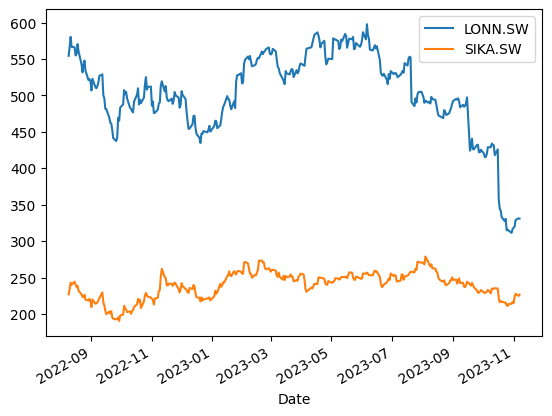

In [2]:
historical_start_date = '2022-08-09'
# Define the ticker list
ticker_list = ['LONN.SW', 'SIKA.SW']

# Fetch the data
data = yf.download(ticker_list, historical_start_date)['Adj Close'] # Auto adjust is false
data.plot()
display(data[data.index == pd.to_datetime('2023-08-08')])


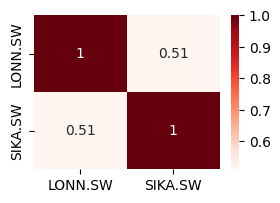

In [3]:
plt.figure(figsize=(3,2))
sns.heatmap(data.corr(), cmap="Reds", annot=True)
plt.show()

In [4]:
data

LONN.SW     SIKA.SW
Date                              
2022-08-09  554.423462  227.111465
2022-08-10  566.350830  234.319778
2022-08-11  580.464905  243.206757
2022-08-12  566.748413  240.343170
2022-08-15  566.152039  244.490433
...                ...         ...
2023-11-01  318.600006  215.199997
2023-11-02  320.000000  223.800003
2023-11-03  329.100006  227.800003
2023-11-06  331.399994  225.000000
2023-11-07  331.100006  226.699997

[318 rows x 2 columns]

In [5]:
# Check all attributes of the constants module
dir(cs)


['BARRIER',
 'CONVERSION_RATIOS',
 'COUPON_PAYMENT_DATES',
 'COUPON_PAYOUT',
 'COUPON_RATE',
 'DENOMINATION',
 'EARLY_REDEMPTION_DATES',
 'EARLY_REDEMPTION_LEVEL',
 'EARLY_REDEMPTION_LEVELS',
 'EARLY_REDEMPTION_OBSERVATION_DATES',
 'EARLY_REDEMPTION_OBSERVATION_FREQUENCY',
 'FINAL_FIXING_DATE',
 'FIRST_PRODUCT_PRICE_EST_DATE',
 'HISTORICAL_START_DATE',
 'INITIAL_FIXING_DATE',
 'ISSUE_PRICE_PERCENTAGE',
 'PAYMENT_DATE',
 'REDEMPTION_DATE',
 'SIX_HOLIDAY_DATES',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'pd']

In [6]:
print(cs.SIX_HOLIDAY_DATES)


[Timestamp('2023-01-02 00:00:00'), Timestamp('2023-04-07 00:00:00'), Timestamp('2023-04-10 00:00:00'), Timestamp('2023-05-01 00:00:00'), Timestamp('2023-05-18 00:00:00'), Timestamp('2023-05-29 00:00:00'), Timestamp('2023-08-01 00:00:00'), Timestamp('2023-12-25 00:00:00'), Timestamp('2023-12-26 00:00:00'), Timestamp('2024-01-01 00:00:00'), Timestamp('2024-01-02 00:00:00'), Timestamp('2024-03-29 00:00:00'), Timestamp('2024-04-01 00:00:00'), Timestamp('2024-05-01 00:00:00'), Timestamp('2024-05-09 00:00:00'), Timestamp('2024-05-20 00:00:00'), Timestamp('2024-08-01 00:00:00'), Timestamp('2024-12-24 00:00:00'), Timestamp('2024-12-25 00:00:00'), Timestamp('2024-12-26 00:00:00'), Timestamp('2024-12-31 00:00:00')]


In [8]:

params = {
    'data': data,
    'ticker_list': ['LONN.SW', 'SIKA.SW']
}
test_model = model.PricingModel(params = params)
test_model.data

bus_date_range = utils.create_six_trading_dates('2023-08-09', '2023-11-07')
# display(bus_date_range)
print(bus_date_range.index.to_list())
for date in bus_date_range.index.to_list():
    print(date, type(date))
    try:
        test_model.multidimensional_gbm(sim_start_date = utils.add_trading_day(date, 1) , hist_window = 252, sim_window = 252)

    except Exception as e:
        # Log the error with the date that caused it
        raise Exception("MultiGBM has error.")


Holidays in the calendar up to 2200: (numpy.datetime64('2200-04-04'), numpy.datetime64('2200-04-07'), numpy.datetime64('2200-05-01'), numpy.datetime64('2200-05-15'), numpy.datetime64('2200-05-26'), numpy.datetime64('2200-08-01'), numpy.datetime64('2200-12-24'), numpy.datetime64('2200-12-25'), numpy.datetime64('2200-12-26'), numpy.datetime64('2200-12-31'))
[Timestamp('2023-08-09 00:00:00'), Timestamp('2023-08-10 00:00:00'), Timestamp('2023-08-11 00:00:00'), Timestamp('2023-08-14 00:00:00'), Timestamp('2023-08-15 00:00:00'), Timestamp('2023-08-16 00:00:00'), Timestamp('2023-08-17 00:00:00'), Timestamp('2023-08-18 00:00:00'), Timestamp('2023-08-21 00:00:00'), Timestamp('2023-08-22 00:00:00'), Timestamp('2023-08-23 00:00:00'), Timestamp('2023-08-24 00:00:00'), Timestamp('2023-08-25 00:00:00'), Timestamp('2023-08-28 00:00:00'), Timestamp('2023-08-29 00:00:00'), Timestamp('2023-08-30 00:00:00'), Timestamp('2023-08-31 00:00:00'), Timestamp('2023-09-01 00:00:00'), Timestamp('2023-09-04 00:00:0

In [ ]:
# # Takes the start and end dates to create a trading calendar for SIX
# # Returns a df with all the dates of trading days as index
# def create_six_trading_dates(start_date, end_date):
#     six_calendar = mcal.get_calendar('SIX')
#     print(f"Holidays in the calendar up to 2200: {six_calendar.holidays().holidays[-10:]}")
#     six_trading_days = six_calendar.valid_days(start_date, end_date)

#     six_trading_days_df = pd.DataFrame(index = six_trading_days)
    
#     # Name the index "Dates"
#     six_trading_days_df.index.name = 'Dates'
#     return six_trading_days_df

trading_df = utils.create_six_trading_dates('2023-01-01', '2023-12-25')
utils.remove_SIX_holidays(data = trading_df)

In [ ]:
# # Input is trading date (assumed) and number of trading days to add (can be positive or negative values)
# # Limitation is to range of dates available is between 2000 and 2200
# def add_trading_day(trading_date, num_trading_day):
#     trading_df = utils.create_six_trading_dates('2000-01-01', '2200-12-31')
#     display(trading_df)
#     try:
#         position = trading_df.index.get_loc(trading_date)
#         print(position)
#     except:
#         raise ValueError(f"{trading_date} is not a trading date or is out of the given date range.")

#     new_position = position + num_trading_day

#     try:
#         return trading_df.index[new_position] # Returns the index of the position (cannot use iloc)
#     except:
#         raise IndexError("The resulting trading date is out of bounds.")
    
#     pass
print(pd.to_datetime('2023-08-10'))
add_trading_day(pd.to_datetime('2023-11-09'), 1)

In [ ]:
# # Still runnable in this block
# sim_start_date = cs.FIRST_PRODUCT_PRICE_EST_DATE + pd.Timedelta(days = 1) # TODO: Need to consider non-business days
# last_avai_price_date = sim_start_date - pd.Timedelta(days = 1)

# S_t = [data.loc[last_avai_price_date, ticker] for ticker in ticker_list] # Stock price of the 0th day of simulation
# time_steps_per_year = 252
# hist_window = time_steps_per_year
# dt = 1/time_steps_per_year
# r = 1.750/100 
# # TODO: from the simulation date to the final fixing date is roughly 8 months, so I choose a 6-month bond yield that is closest to the time horizon (8 months)
# # And then find the closest date to the simulation date (around August 10)
# T = 63 # Number of simulation days (#TODO: To be changed later)
# num_ticker = len(ticker_list) # Number of stocks

# # TODO: Ask if can use historical?
# # Use historical data to estimate covariance matrix. (up to last_avai_price date?)

# # TODO: Save into a df with dates if needed

# hist_data = data[data.index < sim_start_date].tail(hist_window)
# display(hist_data)

# log_returns_list = []
# for ticker in ticker_list:
#     # display(data[ticker], data[ticker].shift(1))
#     log_returns = np.log(hist_data[ticker] / hist_data[ticker].shift(1)) # np.log is natural log, (P_i/P_i-1)
#     log_returns.dropna(inplace = True) # A series
#     log_returns_list.append(log_returns)
#     # print(type(log_returns))

# # print(log_returns_list)
# # print(np.shape(log_returns_list))


# # print(f"np.array {np.array(log_returns_list)}")
# cov_matrix = np.cov(np.array(log_returns_list))
# print(f"Covariance matrix is:\n {cov_matrix}\n")
# print(f"The shape is {np.shape(cov_matrix)}\n")

# print(f"Correlation between the two var is {cov_matrix[0][1] / (cov_matrix[0][0] * cov_matrix[1][1]) ** 0.5}") # Correct

# L = np.linalg.cholesky(cov_matrix)
# print(f"The matrix after Cholesky decomposition is:\n {L}\n")

# print(f"The multiplication of L and L transpose is:\n {np.dot(L, L.T)}\n") 

# sim_data = pd.DataFrame(np.zeros((T, num_ticker)), columns = [ticker_list])

# # display(sim_data)
# # TODO: N number of simulations
 
# # print(sim_data.loc[0, "LONN.SW"])
# for t in range(T): # TODO: change to num of days to sim (date range or sth)
#     Z = np.random.normal(0, 1, num_ticker) # returns a scalar if size is not specified
#     for i in range(num_ticker): # day need to go first, 
#         if t == 0: prev_price = S_t[i]
#         else: prev_price = sim_data.loc[t - 1, ticker_list[i]].item()
#         LZ = np.dot(L, Z)

#         print(type(prev_price), type(cov_matrix[i][i]), type(LZ[i]))
#         print(r, cov_matrix[i][i], LZ[i])
#         sim_data.loc[t, ticker_list[i]] = prev_price * np.exp(r * dt - 0.5 * cov_matrix[i][i] * dt + LZ[i]) # The cov matrix and L need to be computed on the fly

# display(sim_data)

# sim_data.columns = ["simulated_" + ticker for ticker in ticker_list]

# # A dataframe with both validation data and simulated data

# val_df = data[data.index >= sim_start_date]
# print(len(val_df), len(sim_data))
# # Ensure sim_data has the same index as val_df
# sim_data.index = val_df.index

# # Concatenate val_df and sim_data along columns
# val_df_with_sim = pd.concat([val_df, sim_data], axis=1)
# display(val_df_with_sim)

# # for t in time step from simulation start until end date
# # TODO: get market calendar date times: minus weekdays, holidays

# val_df_with_sim.plot()
